# Mutation analysis, Sequence Visualization - DnaFeaturesViewer

In [1]:
# !pip install dna_features_viewer
from dna_features_viewer import GraphicFeature, GraphicRecord
import os
import anndata as ad

In [2]:
base_dir = "/home/jrich/Desktop/CART_prostate_sc"  # os.path.dirname(os.path.dirname(__file__))
run_id = "SAMN10988512_SRX5414523_SRR8615230"
adata_processed_path = "/home/jrich/Desktop/CART_prostate_sc/data/output/SAMN10988512_SRX5414523_SRR8615230/data/adata_processed.h5ad"
show_amino_acid = True
show_counts = True
start_mutation = 0
end_mutation = 5 

data_folder = os.path.join(base_dir, 'data')
output_figure_dir = os.path.join(data_folder, 'output', run_id, 'figures', 'mutation')
output_data_dir = os.path.join(data_folder, 'output', run_id, 'data')

os.makedirs(output_figure_dir, exist_ok=True)
os.makedirs(output_data_dir, exist_ok=True)

adata = ad.read_h5ad(adata_processed_path)
adata.var.head()

/home/jrich/miniconda3/envs/CART2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,header,transcript_count,seq_ID,gene_name,mutation_id,mut_ID,mutation,full_sequence,variant_type,start_nucleotide,end_nucleotide,sequence_length,start_nucleotide_reverse,end_nucleotide_reverse,distance_from_5_prime,distance_from_3_prime,distance_5_prime_bin,distance_3_prime_bin
0,ENST00000439458_UNC80_COSV104380982_58896742,63412.0,ENST00000439458,UNC80,COSV104380982_58896742,UNC80_COSV104380982_58896742,c.8141_8142insTTTTTTTTTTCAAGCAGAAGACGGCATACGAG...,ATGGTGAAGAGGAAGAGCTCCGAGGGCCAGGAGCAGGACGGCGGCC...,insertion,8141.0,8142.0,9777.0,1635.0,1636.0,8141.0,1635.0,8140.0,1630.0
1,ENST00000266503_ARNTL2_COSV104369715_20849862,25806.0,ENST00000266503,ARNTL2,COSV104369715_20849862,ARNTL2_COSV104369715_20849862,c.947_948insTTTTTTTCAAGCAGAAGACGGCATACGAGATGAT...,ATGGCGGCGGAAGAGGAGGCTGCGGCGGGAGGTAAAGTGTTGAGAG...,insertion,947.0,948.0,1911.0,963.0,964.0,947.0,963.0,940.0,960.0
2,ENST00000294725_KCNT2_COSV54078235_26025088,19448.0,ENST00000294725,KCNT2,COSV54078235_26025088,KCNT2_COSV54078235_26025088,c.549_550insACGGCGACCACCGAGAT,ATGGTTGATTTGGAGAGCGAAGTGCCCCCTCTGCCTCCCAGGTACA...,insertion,549.0,550.0,3408.0,2858.0,2859.0,549.0,2858.0,540.0,2850.0
3,ENST00000598320_AC068620.1_COSV51704654_100123354,12439.0,ENST00000598320,AC068620.1,COSV51704654_100123354,AC068620.1_COSV51704654_100123354,c.414G>A,ATGGAGAGTGGAGCAGGAAAGCACTGGACTGAGGAGGAGGTTAAAG...,substitution,414.0,414.0,450.0,36.0,36.0,414.0,36.0,410.0,30.0
4,ENST00000593357_AC137056.1_COSV104978830_98529064,6053.0,ENST00000593357,AC137056.1,COSV104978830_98529064,AC137056.1_COSV104978830_98529064,c.299_302dup,ATGCTTTCAGTTTCTATACTCCATCAATTTGCTTGTCTTGGCTTCT...,duplication,299.0,302.0,408.0,106.0,109.0,299.0,106.0,290.0,100.0


For simplicity, filter out all mutants with ambiguous identity

In [3]:
adata = adata[:, adata.var[~adata.var['header'].str.contains(';', na=False)].index].copy()

Filter adata to keep only top mutations

In [4]:
# # Keep only the mutations from start_mutation:end_mutation
# adata = adata[:, start_mutation:end_mutation].copy()

# Keep only the mutations for the genes that have a mutation in the range of the top start_mutation:end_mutation
top_seq_ids = set(adata[:, start_mutation:end_mutation].var['seq_ID'])
adata = adata[:, adata.var[adata.var['seq_ID'].isin(top_seq_ids)].index]

Import amino acid annotations

In [ ]:
agg_dict = {
    'full_sequence': lambda x: x.iloc[0],
    'sequence_length': lambda x: x.iloc[0],
    'mutation': lambda x: ';'.join(x.astype(str)),
    'variant_type': lambda x: ';'.join(x.astype(str)),
    'transcript_count': lambda x: ';'.join(x.astype(str)),
    'header': lambda x: ';'.join(x.astype(str)),
    'start_nucleotide': lambda x: ';'.join(x.astype(str)),
    'end_nucleotide': lambda x: ';'.join(x.astype(str)),
}

if show_amino_acid:
    agg_dict['mutation_aa'] = lambda x: ';'.join(x.astype(str))

# Perform the groupby and aggregation
top_mutated_genes_df = adata.var.groupby(['seq_ID']).agg(agg_dict).reset_index()

In [5]:
# if show_amino_acid:
#     import pandas as pd
#     import re

#     file_path = '/home/jrich/Desktop/CART_prostate_sc/data/reference/COSMIC/GRCh37/CancerMutationCensus_AllData_Tsv_v100_GRCh37/CancerMutationCensus_AllData_v100_GRCh37.tsv'
#     df = pd.read_csv(file_path, sep='\t', usecols=['GENOMIC_MUTATION_ID', 'MUTATION_URL', 'Mutation AA'])

#     # Create the full_mut_id column
#     def extract_id(mutation_url):
#         match = re.search(r'\?id=(\d+)', mutation_url)
#         if match:
#             return match.group(1)
#         return ''

#     df['GENOMIC_MUTATION_ID'] = df['GENOMIC_MUTATION_ID'].fillna('NA')
#     df['full_mut_id'] = df['GENOMIC_MUTATION_ID'] + '_' + df['MUTATION_URL'].apply(extract_id)

#     adata_var_with_aa = pd.merge(adata.var, df[['full_mut_id', 'Mutation AA']], left_on='mutation_id', right_on='full_mut_id', how='left')

#     def debug_agg(func):
#         def wrapper(x):
#             try:
#                 return func(x)
#             except Exception as e:
#                 print(f"Error processing row: {x}\nException: {e}")
#                 raise e
#         return wrapper

#     top_mutated_genes_df = adata_var_with_aa.groupby(['seq_ID']).agg({
#         'full_sequence': debug_agg(lambda x: x.iloc[0]),
#         'sequence_length': debug_agg(lambda x: x.iloc[0]),
#         'mutation': debug_agg(lambda x: ';'.join(x.astype(str))),
#         'variant_type': debug_agg(lambda x: ';'.join(x.astype(str))),
#         'transcript_count': debug_agg(lambda x: ';'.join(x.astype(str))),
#         'header': debug_agg(lambda x: ';'.join(x.astype(str))),
#         'start_nucleotide': debug_agg(lambda x: ';'.join(x.astype(str))),
#         'end_nucleotide': debug_agg(lambda x: ';'.join(x.astype(str))),
#         'Mutation AA': debug_agg(lambda x: ';'.join(x.astype(str))),
#     }).reset_index()

#     top_mutated_genes_df.rename(columns={'Mutation AA': 'mutation_aa'}, inplace=True)

# else:
#     top_mutated_genes_df = adata.var.groupby(['seq_ID']).agg({
#         'full_sequence': lambda x: x[0],
#         'sequence_length': lambda x: x[0],
#         'mutation': lambda x: ';'.join(x.astype(str)),
#         'variant_type': lambda x: ';'.join(x.astype(str)),
#         'transcript_count': lambda x: ';'.join(x.astype(str)),
#         'header': lambda x: ';'.join(x.astype(str)),
#         'start_nucleotide': lambda x: ';'.join(x.astype(str)),
#         'end_nucleotide': lambda x: ';'.join(x.astype(str)),
#         # 'Mutation AA': lambda x: ';'.join(x.astype(str)),
#     }).reset_index()

In [6]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_on_multiple_pages(
    self,
    pdf_target,
    n_lines=None,
    nucl_per_line=None,
    lines_per_page=5,
    figure_width="auto",
    translation_params=None,
    **plot_params
):
    """Plot the features on different lines on different pages of a PDF.

    This function returns None

    Parameters
    ----------

    pdf_target
        Either a path to a PDF, or a file(-like) handle.

    n_lines
        Number of lines on which the record will be plotted. A number of
        nucleotides per line can be provided instead (see below).

    nucl_per_line
        Number of nucleotides to be represented on every line (determines
        the number of lines ``n_lines``).

    lines_per_page
        Number of lines on each page.

    plot_sequence
        Whether to plot the nucleotide sequence on each line.

    figure_width
        Width of the figure in inches. Leave to auto for a width of either 10
        (if not sequence is plotted) or 0.15*nucl_per_line inches
        (if a sequence is plotted).

    translation_params
        Parameters for sequence translation. By default (``None``), it does
        not plot a translated sequence.

    **plot_params
        Parameters from ``graphic_record.plot()`` to be used in the plotting
        of the individual lines. This includes ``draw_line``, ``with_ruler``,
        ``annotate_inline``, ``plot_sequence``,
        ``evelate_outline_annotations``, ``strand_in_label_pixel_threshold``.
    """
    nucl_per_page = nucl_per_line * lines_per_page
    number_of_pages = int(numpy.ceil(self.sequence_length / nucl_per_page))
    with PdfPages(pdf_target) as pdf:
        for page_index in range(number_of_pages):
            first, last = self.first_index, self.last_index
            page_start = first + page_index * nucl_per_page
            page_end = first + (page_index + 1) * nucl_per_page
            page_end = min(last, page_end)
            page_record = self.crop((page_start, page_end))
            fig, axes = page_record.plot_on_multiple_lines(
                nucl_per_line=nucl_per_line,
                figure_width=figure_width,
                translation_params=translation_params,
                **plot_params
            )
            if page_index == 0:  #! my new line
                plot_title = f"{pdf_target.split('/')[-1].split('_')[0]}_{pdf_target.split('/')[-1].split('_')[1]}"  #! my new line
                fig.suptitle(plot_title, fontsize=16, fontweight='bold', ha='left')  #! my new line
            pdf.savefig(fig)
            plt.close(fig)

GraphicRecord.plot_on_multiple_pages = plot_on_multiple_pages

Processing ENST00000266503_ARNTL2_COSV104369715_20849862
Saved ENST00000266503_ARNTL2.png in f/home/jrich/Desktop/CART_prostate_sc/data/output/SAMN10988512_SRX5414523_SRR8615230/figures/mutation
Saved ENST00000266503_ARNTL2_multipage.pdf in f/home/jrich/Desktop/CART_prostate_sc/data/output/SAMN10988512_SRX5414523_SRR8615230/figures/mutation
Processing ENST00000294725_KCNT2_COSV54078235_26025088
Saved ENST00000294725_KCNT2.png in f/home/jrich/Desktop/CART_prostate_sc/data/output/SAMN10988512_SRX5414523_SRR8615230/figures/mutation
Saved ENST00000294725_KCNT2_multipage.pdf in f/home/jrich/Desktop/CART_prostate_sc/data/output/SAMN10988512_SRX5414523_SRR8615230/figures/mutation
Processing ENST00000439458_UNC80_COSV104380982_58896742
Saved ENST00000439458_UNC80.png in f/home/jrich/Desktop/CART_prostate_sc/data/output/SAMN10988512_SRX5414523_SRR8615230/figures/mutation
Saved ENST00000439458_UNC80_multipage.pdf in f/home/jrich/Desktop/CART_prostate_sc/data/output/SAMN10988512_SRX5414523_SRR861

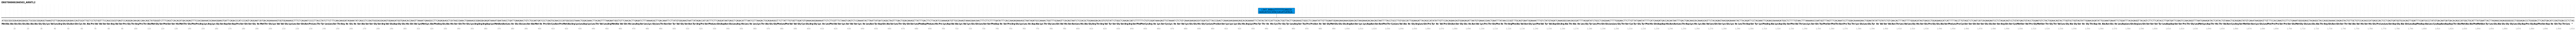

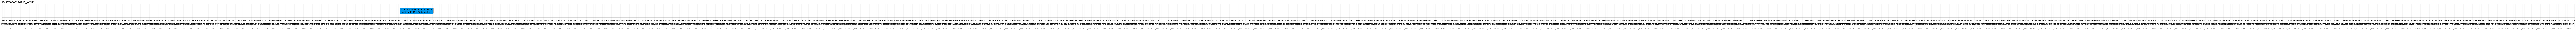

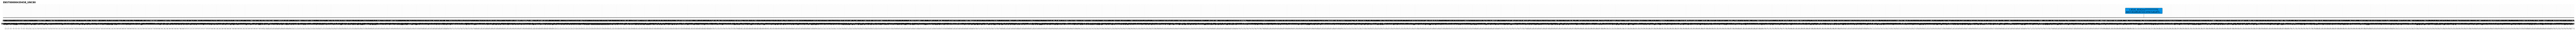

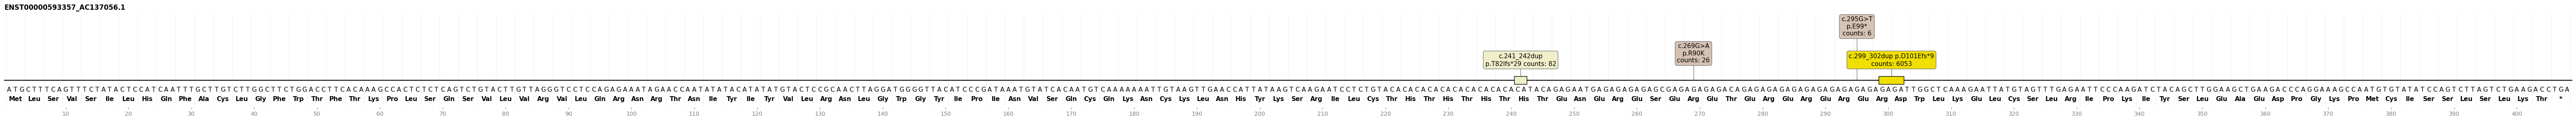

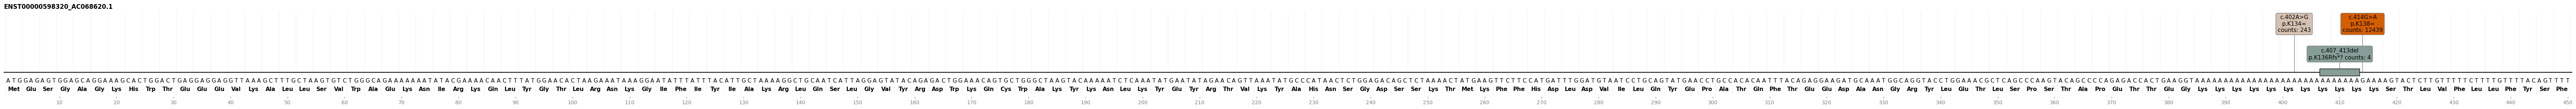

In [10]:
import colorsys

mutation_color_dict = {
    "substitution": "#D55E00",
    "insertion": "#56B4E9",
    "deletion": "#009E73",
    "delins": "#AD7700",
    "duplication": "#F0E442",
    "inversion": "#CC79A7"
}

def hex_intensity(hex_color: str, intensity: float):
    # Convert hex to RGB
    r = int(hex_color[1:3], 16) / 255
    g = int(hex_color[3:5], 16) / 255
    b = int(hex_color[5:7], 16) / 255

    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    s = intensity
    r, g, b = colorsys.hsv_to_rgb(h, s, v)

    return f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}"

def plot_mutation_locations(row, show_amino_acid = False, show_counts = False, wrapped = False, output_figure_dir = "."):
    sequence = row.full_sequence
    mutation_cds_list = row.mutation
    variant_type_list = row.variant_type
    start_nucleotide_list = row.start_nucleotide
    end_nucleotide_list = row.end_nucleotide
    transcript_count_list = row.transcript_count
    sequence_length = int(row.sequence_length)

    mutation_cds_list = mutation_cds_list.split(';')
    variant_type_list = variant_type_list.split(';')
    start_nucleotide_list = start_nucleotide_list.split(';')
    end_nucleotide_list = end_nucleotide_list.split(';')
    transcript_count_list = transcript_count_list.split(';')

    if show_amino_acid:
        mutation_aa_list = row.mutation_aa.split(';')

    features = []

    for i in range(len(mutation_cds_list)):
        mutation_cds = mutation_cds_list[i]
        variant_type = variant_type_list[i]
        start_position = float(start_nucleotide_list[i])
        end_position = float(end_nucleotide_list[i])

        if variant_type == "substitution":
            start_position += 0.5
            end_position = start_position
        elif variant_type == "insertion":
            start_position += 1
            # end_position = end_position
        elif variant_type == "deletion" or variant_type == "duplication" or variant_type == "inversion" or variant_type == "delins":
            # start_position = start_position
            end_position += 1

        label = mutation_cds

        if show_amino_acid:
            mutation_aa = mutation_aa_list[i]
            label = label + f"\n{mutation_aa}"
        
        transcript_count_list_floats = [float(v) for v in transcript_count_list]

        if show_counts:
            transcript_count = int(transcript_count_list_floats[i])
            label = label + f"\ncounts: {transcript_count}"
        
        count = transcript_count_list_floats[i]
        max_count = max(transcript_count_list_floats)

        col = mutation_color_dict[variant_type]
        col = hex_intensity(col, 0.15 + ((count / max_count) * (1-0.15)))
        features.append(GraphicFeature(start=start_position, end=end_position, strand=0, color=col, box_color=col, label=label))

    # ticks_resolution = "auto"
    record = GraphicRecord(sequence=sequence, first_index = 1, ticks_resolution = 10, features=features)

    plot_title = f"{row.header.split('_')[0]}_{row.header.split('_')[1]}"
    figure_width = sequence_length // 5
    figure_width = min(figure_width, 250)  # cap the figure width
    ax, _ = record.plot(figure_width=figure_width)  # in inches; figure_height just increases the size of the white space above
    ax.set_title(plot_title, loc='left', weight='bold')
    record.plot_sequence(ax)
    record.plot_translation(ax, location = (1, sequence_length + 1), fontdict={'weight': 'bold'})
    ax.figure.savefig(f'{output_figure_dir}/{plot_title}.png', bbox_inches='tight')
    print(f"Saved {plot_title}.png in f{output_figure_dir}")

    if wrapped:
        translation_params = {
            "location": (1, sequence_length + 1),
            "fontdict": {"weight": "bold"},
            "long_form_translation": True,  # 1 vs 3 letter code
            "guides_intensity": 0.1  # default 0.5
        }   # default None; go into plot_translation function to see the rest of the options

        record.plot_on_multiple_pages(
            f"{output_figure_dir}/{plot_title}_multipage.pdf",
            nucl_per_line=90,
            lines_per_page=7,
            plot_sequence=True,
            translation_params=translation_params
        )

        print(f"Saved {plot_title}_multipage.pdf in f{output_figure_dir}")


for row in top_mutated_genes_df.iloc[start_mutation:end_mutation].itertuples():
    print(f"Processing {row.header}")
    plot_mutation_locations(row, show_amino_acid=show_amino_acid, show_counts=show_counts, wrapped=True, output_figure_dir=output_figure_dir)

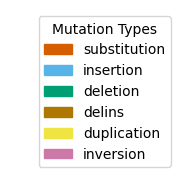

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

mutation_color_dict = {
    "substitution": "#D55E00",
    "insertion": "#56B4E9",
    "deletion": "#009E73",
    "delins": "#AD7700",
    "duplication": "#F0E442",
    "inversion": "#CC79A7"
}

# Create custom legend patches
legend_patches = [Patch(color=color, label=mutation) for mutation, color in mutation_color_dict.items()]

# Create a figure and a single subplot
fig, ax = plt.subplots()

# Add the legend to the plot
ax.legend(handles=legend_patches, title="Mutation Types")

# Remove the axes for a clean look
ax.axis('off')

plt.tight_layout(pad=17)

# Display the plot
plt.show()